Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Final dataset shapes:
Training data: (1500, 32, 32, 3)
Training labels: (1500, 3)
Test data: (300, 32, 32, 3)
Test labels: (300, 3)


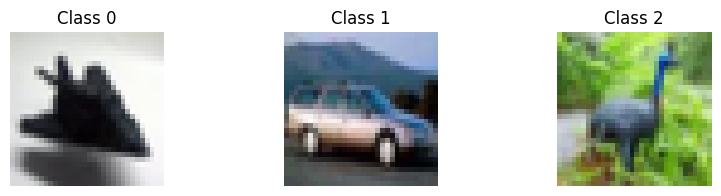

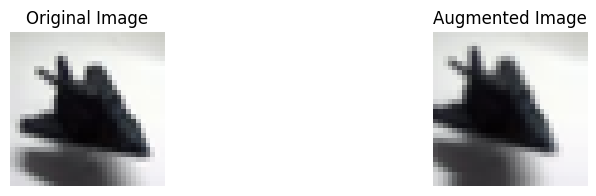

In [1]:
# Install required packages
#!pip install tensorflow numpy matplotlib

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_and_preprocess_data(num_classes=3, samples_per_class=500):
    """
    Load and preprocess CIFAR-10 data with reduced dataset size
    Args:
        num_classes: Number of classes to use (default: 3)
        samples_per_class: Number of samples per class (default: 500)
    Returns:
        Preprocessed training and validation data with their labels
    """
    print("Loading CIFAR-10 dataset...")
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Convert labels to one-hot encoding
    y_train = y_train.squeeze()
    y_test = y_test.squeeze()

    # Select subset of classes and samples
    selected_indices_train = []
    selected_indices_test = []

    for i in range(num_classes):
        train_indices = np.where(y_train == i)[0][:samples_per_class]
        test_indices = np.where(y_test == i)[0][:samples_per_class//5]  # 20% for testing
        selected_indices_train.extend(train_indices)
        selected_indices_test.extend(test_indices)

    # Create reduced dataset
    x_train = x_train[selected_indices_train]
    y_train = y_train[selected_indices_train]
    x_test = x_test[selected_indices_test]
    y_test = y_test[selected_indices_test]

    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Create data augmentation pipeline
    data_augmentation = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Convert labels to categorical
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)

    print(f"Final dataset shapes:")
    print(f"Training data: {x_train.shape}")
    print(f"Training labels: {y_train.shape}")
    print(f"Test data: {x_test.shape}")
    print(f"Test labels: {y_test.shape}")

    return x_train, y_train, x_test, y_test, data_augmentation

def visualize_samples(x_train, y_train, num_classes):
    """
    Visualize sample images from the dataset
    """
    plt.figure(figsize=(10, 2))
    for i in range(num_classes):
        idx = np.where(np.argmax(y_train, axis=1) == i)[0][0]
        plt.subplot(1, num_classes, i + 1)
        plt.imshow(x_train[idx])
        plt.title(f'Class {i}')
        plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Set random seed for reproducibility
    tf.random.set_seed(42)
    np.random.seed(42)

    # Load and preprocess data
    num_classes = 3
    samples_per_class = 500
    x_train, y_train, x_test, y_test, data_augmentation = load_and_preprocess_data(
        num_classes=num_classes,
        samples_per_class=samples_per_class
    )

    # Visualize sample images
    visualize_samples(x_train, y_train, num_classes)

    # Example of data augmentation
    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(x_train[0])
    plt.title('Original Image')
    plt.axis('off')

    # Get augmented image
    img = x_train[0].reshape((1,) + x_train[0].shape)
    aug_img = next(data_augmentation.flow(img, batch_size=1))[0]

    plt.subplot(1, 2, 2)
    plt.imshow(aug_img)
    plt.title('Augmented Image')
    plt.axis('off')
    plt.show()

In [4]:
!pip install optuna
!pip install gradio
!pip install joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
    

Loading CIFAR-10 dataset...
Dataset shapes:
x_train: (1500, 32, 32, 3), y_train: (1500, 3)
x_test: (300, 32, 32, 3), y_test: (300, 3)

Training model...
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.4447 - loss: 1.1730
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to model_results/best_model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 61s 603ms/step - accuracy: 0.4446 - loss: 1.1711 - val_accuracy: 0.0000e+00 - val_loss: 1.8577 - learning_rate: 0.0010
Epoch 2/100
35/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4300 - loss: 1.0516
Epoch 2: val_accuracy did not improve from 0.00000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4317 - loss: 1.0489 - val_accuracy: 0.0000e+00 - val_loss: 3.0941 - learning_rate: 0.0010
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5512 - loss: 0.9854
Epoch 3: val_accuracy did not improve from 0.00000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5519 - loss: 0.9842 - val_accuracy: 0.0000e

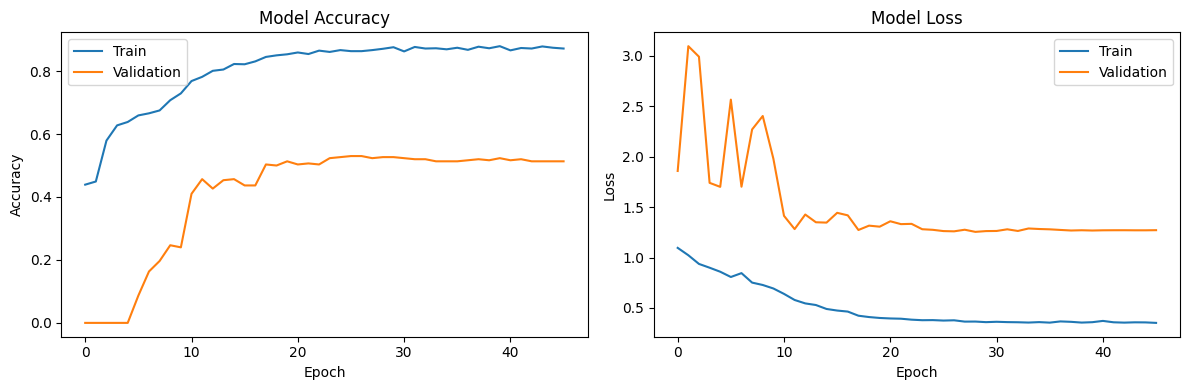


Final model saved to: model_results/final_model.keras

Evaluating model...

Test accuracy: 0.6700
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step


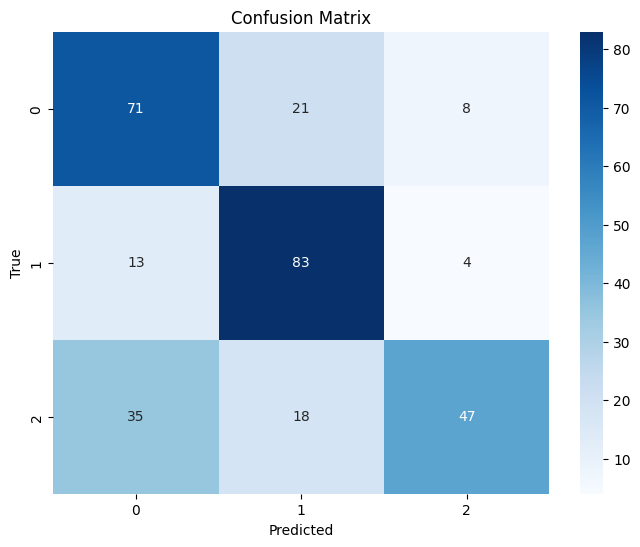


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       100
           1       0.68      0.83      0.75       100
           2       0.80      0.47      0.59       100

    accuracy                           0.67       300
   macro avg       0.69      0.67      0.66       300
weighted avg       0.69      0.67      0.66       300


Training completed successfully!


In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
from tensorflow.keras import layers, Model

def load_and_preprocess_data(num_classes=3, samples_per_class=500):
    """Load and preprocess CIFAR-10 data"""
    print("Loading CIFAR-10 dataset...")
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Select subset of data
    selected_train = []
    selected_test = []
    for i in range(num_classes):
        class_indices_train = np.where(y_train.squeeze() == i)[0][:samples_per_class]
        class_indices_test = np.where(y_test.squeeze() == i)[0][:samples_per_class//5]
        selected_train.extend(class_indices_train)
        selected_test.extend(class_indices_test)

    # Create final datasets
    x_train = x_train[selected_train].astype('float32') / 255.0
    x_test = x_test[selected_test].astype('float32') / 255.0
    y_train = tf.keras.utils.to_categorical(y_train[selected_train], num_classes)
    y_test = tf.keras.utils.to_categorical(y_test[selected_test], num_classes)

    print(f"Dataset shapes:")
    print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

    return x_train, y_train, x_test, y_test

class PatchEncoder(layers.Layer):
    def __init__(self, patch_size, embed_dim):
        super().__init__()
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.projection = layers.Conv2D(embed_dim, patch_size, patch_size)

    def call(self, inputs):
        patches = self.projection(inputs)
        batch_size = tf.shape(patches)[0]
        patches = tf.reshape(patches, [batch_size, -1, self.embed_dim])
        return patches

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, mlp_dim, dropout=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim//num_heads)
        self.ffn = tf.keras.Sequential([
            layers.Dense(mlp_dim, activation=tf.nn.gelu),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout)
        self.dropout2 = layers.Dropout(dropout)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class ViT(Model):
    def __init__(self, input_shape=(32, 32, 3), patch_size=4, num_classes=3, embed_dim=64,
                 num_heads=4, num_layers=6, mlp_dim=128, dropout=0.1):
        super().__init__()
        self.patch_size = patch_size
        num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)

        self.patch_embed = PatchEncoder(patch_size, embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patches, output_dim=embed_dim)
        self.transformer_blocks = [
            TransformerBlock(embed_dim, num_heads, mlp_dim, dropout)
            for _ in range(num_layers)
        ]
        self.mlp_head = tf.keras.Sequential([
            layers.LayerNormalization(epsilon=1e-6),
            layers.Dense(mlp_dim, activation=tf.nn.gelu),
            layers.Dropout(dropout),
            layers.Dense(num_classes, activation='softmax')
        ])

    def call(self, inputs, training=False):
        x = self.patch_embed(inputs)

        # Add positional embeddings
        positions = tf.range(start=0, limit=tf.shape(x)[1])
        pos_embeddings = self.pos_embed(positions)
        x = x + pos_embeddings

        # Apply Transformer blocks
        for block in self.transformer_blocks:
            x = block(x, training=training)

        # Global average pooling and classification
        x = tf.reduce_mean(x, axis=1)
        x = self.mlp_head(x, training=training)
        return x

def create_model():
    model = ViT(
        input_shape=(32, 32, 3),
        patch_size=4,
        num_classes=3,
        embed_dim=64,
        num_heads=4,
        num_layers=6,
        mlp_dim=128,
        dropout=0.1
    )

    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=1e-3,
        weight_decay=0.0001
    )

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def train_and_evaluate(x_train, y_train, x_test, y_test, save_dir="model_results"):
    """Train and evaluate the model"""

    # Create save directory
    os.makedirs(save_dir, exist_ok=True)

    # Create model
    model = create_model()

    # Define callbacks with increased patience
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=20,  # Increased
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-6,
            verbose=1
        ),
        tf.keras.callbacks.ModelCheckpoint(
            filepath=os.path.join(save_dir, 'best_model.keras'),
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

    # Train model
    print("\nTraining model...")
    history = model.fit(
        x_train, y_train,
        batch_size=32,
        epochs=100,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=1
    )

    # Plot and display training history
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()  # This will display the plots

    # Save final model
    final_model_path = os.path.join(save_dir, 'final_model.keras')
    model.save(final_model_path)
    print(f"\nFinal model saved to: {final_model_path}")

    # Evaluate model
    print("\nEvaluating model...")
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nTest accuracy: {test_accuracy:.4f}")

    # Generate and display confusion matrix
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()  # This will display the confusion matrix

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    return model, history

def main():
    # Set random seeds
    tf.random.set_seed(42)
    np.random.seed(42)

    # Load and preprocess data
    x_train, y_train, x_test, y_test = load_and_preprocess_data(
        num_classes=3,
        samples_per_class=500
    )

    # Train and evaluate model
    model, history = train_and_evaluate(x_train, y_train, x_test, y_test)

    print("\nTraining completed successfully!")

if __name__ == "__main__":
    main()